# HR Analytics: Attfiction & Churn Analysis

### Load libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


## Preprocessing

#### Load dataset

In [77]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


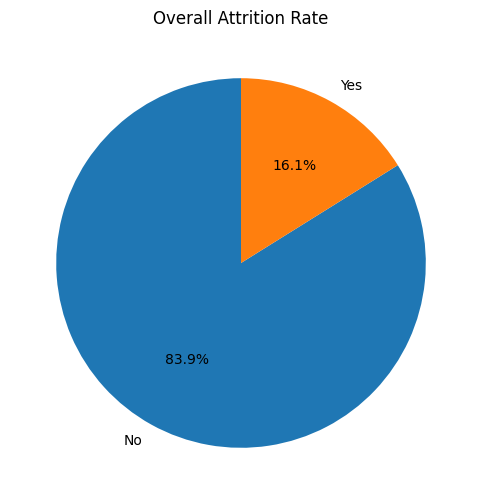

<Figure size 800x600 with 0 Axes>

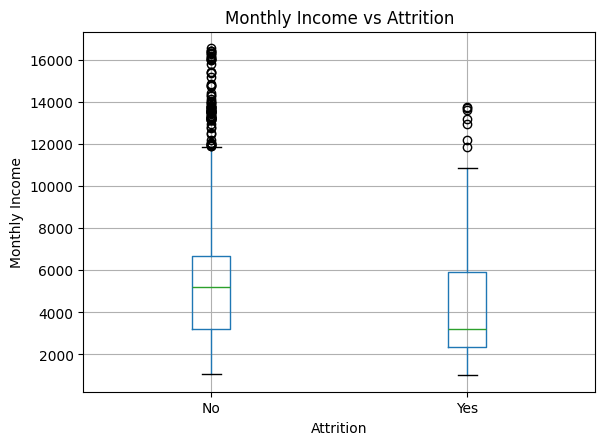

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,5785.356457,3207.040352,1051.0,3211.0,5204.0,6687.0,16555.0
Yes,237.0,4513.656778,2944.741194,1009.0,2373.0,3202.0,5916.0,13758.0


In [78]:
import matplotlib.pyplot as plt

# 이직률 계산
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# 1. 이직률 시각화 (파이 차트)
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Attrition Rate")
plt.show()

# 2. 급여 수준과 이직 관계 시각화 (박스플롯)
plt.figure(figsize=(8,6))
df.boxplot(column="MonthlyIncome", by="Attrition")
plt.title("Monthly Income vs Attrition")
plt.suptitle("")
plt.ylabel("Monthly Income")
plt.show()

# 3. 급여와 이직률 관계 통계 요약
income_by_attrition = df.groupby("Attrition")["MonthlyIncome"].describe()
income_by_attrition


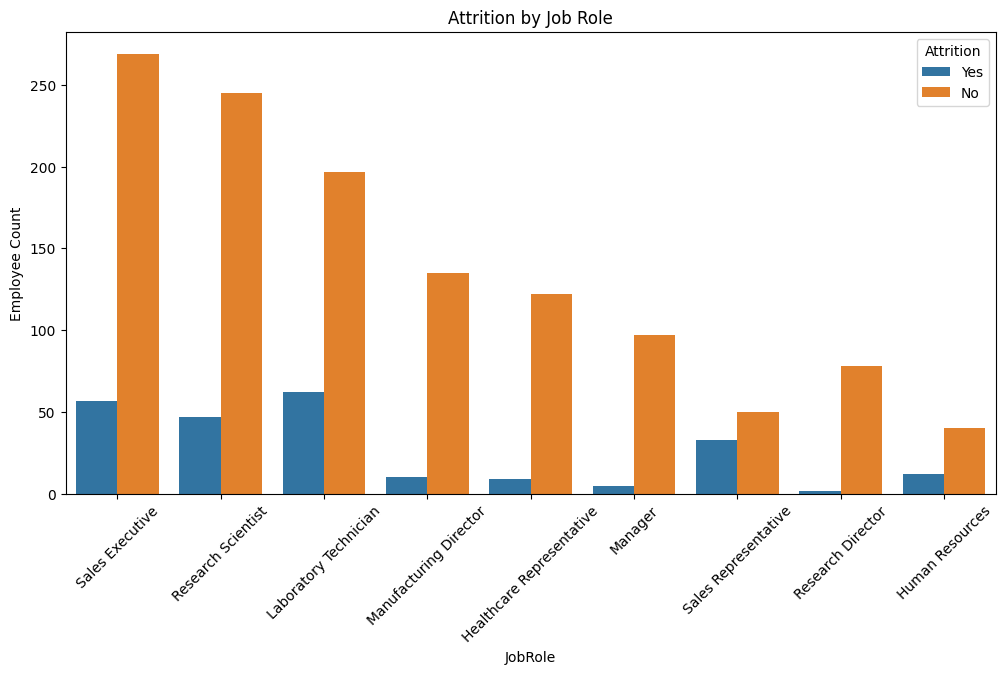

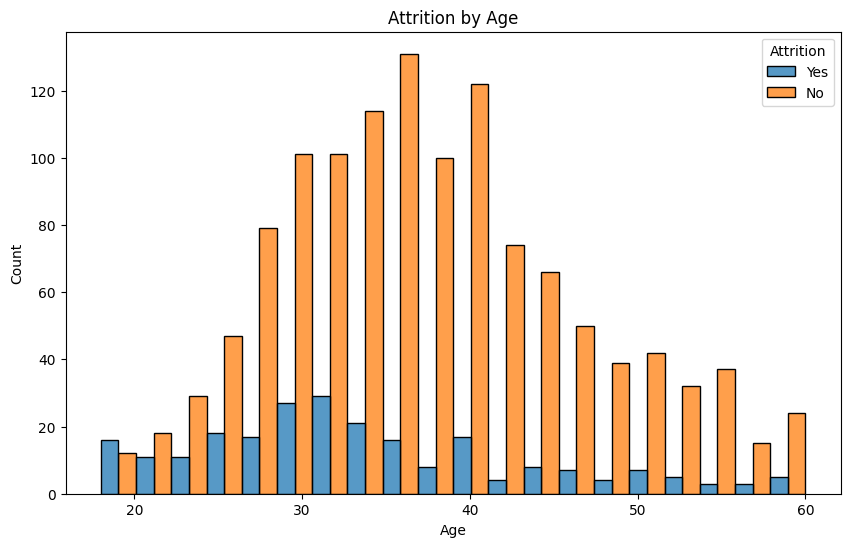

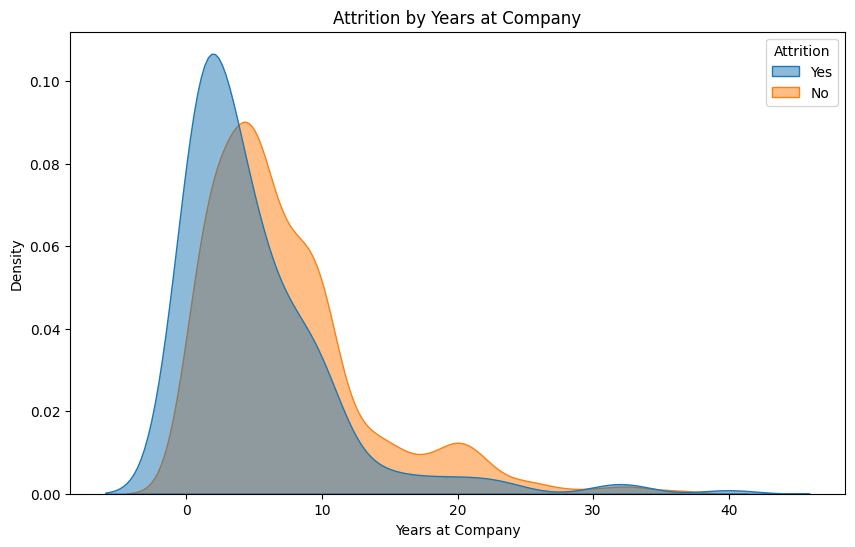

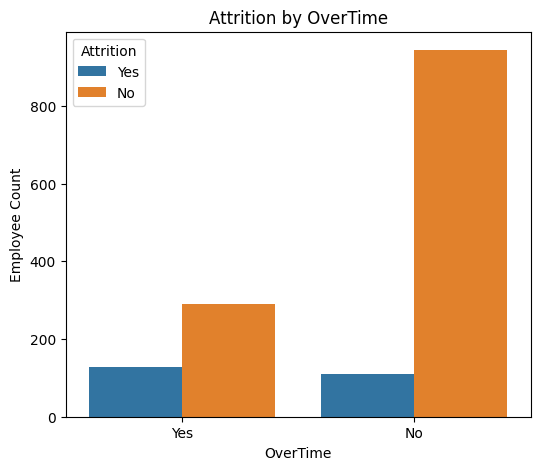

=== 통계적 검정 결과 ===
T-test: t=-6.000, p-value=0.0000
Mann-Whitney U test: U=103915.0, p-value=0.0000


In [79]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 1. 직무별(JobRole) 이직률 비교 (막대 그래프)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="JobRole", hue="Attrition")
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.ylabel("Employee Count")
plt.show()

# 2. 연령대(Age)와 이직률 관계 (히스토그램)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Attrition", bins=20, kde=False, multiple="dodge")
plt.title("Attrition by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. 근속연수(YearsAtCompany)와 이직률 관계 (커널밀도 + 히스토그램)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="YearsAtCompany", hue="Attrition", fill=True, common_norm=False, alpha=0.5)
plt.title("Attrition by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Density")
plt.show()

# 4. 초과근무 여부(OverTime)와 이직률 관계
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title("Attrition by OverTime")
plt.ylabel("Employee Count")
plt.show()

# 5. 급여 차이에 대한 통계적 검정
income_yes = df[df["Attrition"]=="Yes"]["MonthlyIncome"]
income_no = df[df["Attrition"]=="No"]["MonthlyIncome"]

# 독립표본 t-test
t_stat, p_val_t = ttest_ind(income_yes, income_no, equal_var=False)

# Mann-Whitney U test (비모수 검정)
u_stat, p_val_u = mannwhitneyu(income_yes, income_no, alternative="two-sided")

print("=== 통계적 검정 결과 ===")
print(f"T-test: t={t_stat:.3f}, p-value={p_val_t:.4f}")
print(f"Mann-Whitney U test: U={u_stat}, p-value={p_val_u:.4f}")


/opt/anaconda3/envs/data-env03/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



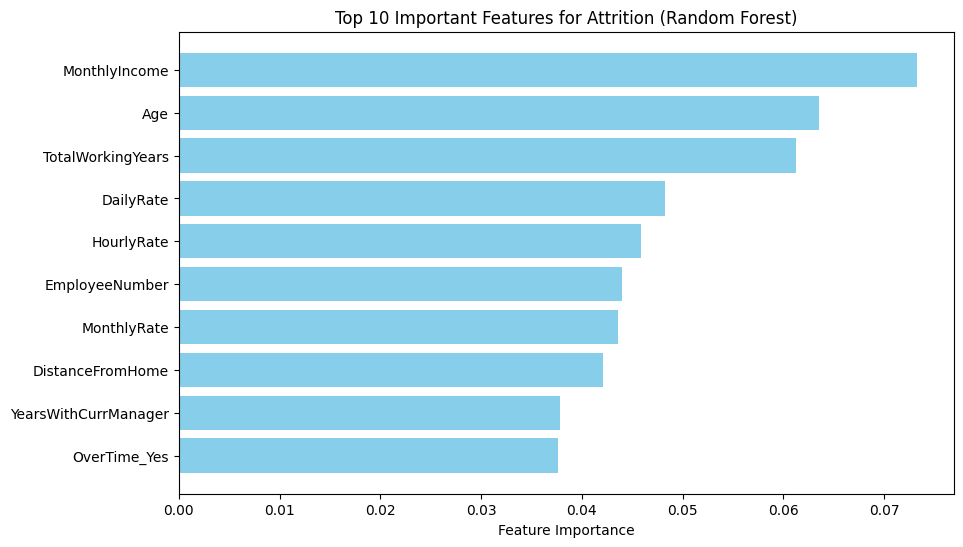

(                     Feature  Coefficient
 24   YearsSinceLastPromotion     0.200376
 46              OverTime_Yes     0.193869
 18          StockOptionLevel    -0.190353
 6    EnvironmentSatisfaction    -0.188680
 10           JobSatisfaction    -0.177739
 13        NumCompaniesWorked     0.174703
 8             JobInvolvement    -0.139112
 23        YearsInCurrentRole    -0.125111
 16  RelationshipSatisfaction    -0.121940
 45      MaritalStatus_Single     0.120125,
                  Feature  Importance
 11         MonthlyIncome    0.073238
 0                    Age    0.063545
 19     TotalWorkingYears    0.061277
 1              DailyRate    0.048209
 7             HourlyRate    0.045854
 5         EmployeeNumber    0.044029
 12           MonthlyRate    0.043579
 2       DistanceFromHome    0.042052
 25  YearsWithCurrManager    0.037818
 46          OverTime_Yes    0.037659)

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Target 변수 변환 (Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 범주형/수치형 분리
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(exclude=['object']).drop(columns=['Attrition']).columns

# 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 설명 변수(X), 타겟 변수(y)
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ---------------------
# 로지스틱 회귀 모델
# ---------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 회귀 계수 정리
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

# ---------------------
# 랜덤 포레스트 모델
# ---------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 변수 중요도
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# ---------------------
# 시각화 (랜덤포레스트 중요도 상위 10개)
# ---------------------
top_features = importance_df.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_features["Feature"], top_features["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Attrition (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()

coef_df.head(10), importance_df.head(10)
